## Data Understanding


Overview Data ini berkaitan dengan kendaraan listrik (Electric Vehicles/EV) yang mencakup berbagai atribut identifikasi kendaraan, informasi geografis, spesifikasi teknis, serta status kelayakan dalam program kendaraan bahan bakar alternatif bersih (Clean Alternative Fuel Vehicle/CAFV). Data ini bisa digunakan untuk memahami karakteristik kendaraan listrik, penyebaran geografisnya, dan analisis terhadap program energi bersih.
Berikut adalah deskripsi dari atribut-atribut yang tertera dalam data di atas:

1. VIN (Vehicle Identification Number): Merupakan nomor identifikasi unik yang diberikan untuk setiap kendaraan. Kombinasi angka dan huruf ini digunakan untuk mengidentifikasi kendaraan secara global.

2. County: Nama wilayah administratif tempat kendaraan terdaftar, seperti kabupaten atau setingkatnya.

3. City: Nama kota tempat kendaraan terdaftar.

4. State: Nama negara bagian atau provinsi tempat kendaraan terdaftar.

5. Postal Code: Kode pos yang mewakili lokasi kendaraan terdaftar.

6. Model Year: Tahun pembuatan atau model dari kendaraan tersebut.

7. Make: Merek dari kendaraan (misalnya CHEVROLET, KIA, FORD, TESLA).

8. Model: Nama model spesifik dari kendaraan (misalnya VOLT, NIRO, MUSTANG MACH-E, MODEL Y, SOUL EV).

9. Electric Vehicle Type: Jenis kendaraan listrik yang dikategorikan ke dalam beberapa tipe seperti:

10. Battery Electric Vehicle (BEV): Kendaraan yang sepenuhnya digerakkan oleh baterai.
11. Clean Alternative Fuel Vehicle (CAFV) Eligibility: Status apakah kendaraan memenuhi syarat untuk dianggap sebagai kendaraan bahan bakar alternatif yang bersih sesuai regulasi.

12. Electric Range: Jarak yang dapat ditempuh kendaraan dalam mode listrik penuh, biasanya diukur dalam mil (contoh: 53.0 mil).

13. Base MSRP: Harga eceran pabrikan dasar dari kendaraan tersebut dalam USD (biasanya sebelum pajak atau biaya tambahan lainnya).

14. Legislative District: Wilayah pemilihan legislatif di mana kendaraan tersebut terdaftar.

15. DOL Vehicle ID: Nomor identifikasi kendaraan dari Departemen Kendaraan Bermotor (DOL).

16. Vehicle Location: Lokasi kendaraan yang terdaftar, dalam beberapa kasus ditampilkan sebagai koordinat geografis (misalnya, "POINT (-122.5142593 37.9718263)").

17. Electric Utility: Penyedia listrik atau utilitas listrik yang melayani wilayah tempat kendaraan terdaftar.

18. 2020 Census Tract: Kode daerah sensus berdasarkan data sensus 2020 yang mengidentifikasi wilayah geografis tertentu untuk tujuan statistik.




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

df = pd.read_csv('/content/drive/MyDrive/Dataset/Electric_Vehicle_Population_Data.csv')
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,1C4RJXN66R,Snohomish,Everett,WA,98204.0,2024,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21.0,0.0,21.0,261311557,POINT (-122.2507211 47.8976713),PUGET SOUND ENERGY INC,5.306104e+10
1,KNDJX3AEXG,King,Renton,WA,98058.0,2016,KIA,SOUL,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,93.0,31950.0,11.0,210641315,POINT (-122.1476337 47.4438471),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
2,5YJ3E1EA3L,King,Seattle,WA,98125.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,266.0,0.0,46.0,124517347,POINT (-122.304356 47.715668),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
3,1G1RC6S5XH,Kitsap,Port Orchard,WA,98367.0,2017,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,53.0,0.0,26.0,7832933,POINT (-122.6530052 47.4739066),PUGET SOUND ENERGY INC,5.303509e+10
4,5UXTA6C09P,Snohomish,Monroe,WA,98272.0,2023,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,30.0,0.0,39.0,235249262,POINT (-121.968385 47.854897),PUGET SOUND ENERGY INC,5.306105e+10


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194232 entries, 0 to 194231
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         194232 non-null  object 
 1   County                                             194223 non-null  object 
 2   City                                               194223 non-null  object 
 3   State                                              194232 non-null  object 
 4   Postal Code                                        194223 non-null  float64
 5   Model Year                                         194232 non-null  int64  
 6   Make                                               194232 non-null  object 
 7   Model                                              194232 non-null  object 
 8   Electric Vehicle Type                              194232 non-null  object

In [3]:
df.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,194223.000000,194232.000000,194230.000000,194230.000000,193800.000000,1.942320e+05,1.942230e+05
mean,98175.800678,2020.781807,54.835458,978.730732,29.009954,2.248923e+08,5.297532e+10
std,2435.345863,2.999041,89.614355,7988.719011,14.901335,7.357830e+07,1.607770e+09
min,1731.000000,1997.000000,0.000000,0.000000,1.000000,4.385000e+03,1.001020e+09
25%,98052.000000,2019.000000,0.000000,0.000000,17.000000,1.872251e+08,5.303301e+10
50%,98125.000000,2022.000000,0.000000,0.000000,33.000000,2.339402e+08,5.303303e+10
75%,98372.000000,2023.000000,68.000000,0.000000,42.000000,2.601159e+08,5.305307e+10
max,99577.000000,2025.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.602100e+10


In [4]:
df[df.duplicated()]

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract


In [5]:
df.isnull().sum()

,0
VIN (1-10),0
County,9
City,9
State,0
Postal Code,9
Model Year,0
Make,0
Model,0
Electric Vehicle Type,0
Clean Alternative Fuel Vehicle (CAFV) Eligibility,0


In [6]:
df[df.isna().any(axis=1)]

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
137,1G1RB6S53J,NaN,NaN,BC,NaN,2018,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,53.0,0.0,NaN,477613216,NaN,NaN,NaN
21923,KNDCD3LD6N,Marin,San Rafael,CA,94901.0,2022,KIA,NIRO,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26.0,0.0,NaN,181521700,POINT (-122.5142593 37.9718263),NON WASHINGTON STATE ELECTRIC UTILITY,6.041111e+09
34150,3FMTK1SS4P,Montgomery,Kensington,MD,20895.0,2023,FORD,MUSTANG MACH-E,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,NaN,239901049,POINT (-77.078231 39.030798),NON WASHINGTON STATE ELECTRIC UTILITY,2.403170e+10
40751,7SAYGDEF5P,Montgomery,Bethesda,MD,20814.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,NaN,235114918,POINT (-77.099577 38.992455),NON WASHINGTON STATE ELECTRIC UTILITY,2.403170e+10
45793,KNDJX3AE8H,Pacific,Long Beach,WA,98634.0,2017,KIA,SOUL EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,93.0,32250.0,19.0,106442773,NaN,BONNEVILLE POWER ADMINISTRATION||PUD NO 2 OF P...,5.304995e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193539,5YJSA1E43G,Tooele,Tooele,UT,84074.0,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210.0,0.0,NaN,206808885,POINT (-112.2957843 40.5664923),NON WASHINGTON STATE ELECTRIC UTILITY,4.904513e+10
193560,WA1E2AFY7P,Douglas,Castle Rock,CO,80104.0,2023,AUDI,Q5 E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,23.0,0.0,NaN,240663202,POINT (-104.8367434 39.3603485),NON WASHINGTON STATE ELECTRIC UTILITY,8.035015e+09
193572,5YJ3E1EA8P,Fairfax,Alexandria,VA,22308.0,2023,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,NaN,236649143,POINT (-77.056662 38.728118),NON WASHINGTON STATE ELECTRIC UTILITY,5.105942e+10
193624,3FA6P0SU5E,New Haven,Madison,CT,6443.0,2014,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,19.0,0.0,NaN,148736234,POINT (-72.610716 41.313697),NON WASHINGTON STATE ELECTRIC UTILITY,9.009194e+09


# Data Cleaning

In [7]:
jml_missing = df.isna().any(axis=1).sum()

In [8]:
percentage_missing = (jml_missing / len(df)) * 100

print(f"Persentase missing value: {percentage_missing:.2f}%")


Persentase missing value: 0.23%


In [9]:
df.dropna(inplace=True)
df.isnull().sum()

,0
VIN (1-10),0
County,0
City,0
State,0
Postal Code,0
Model Year,0
Make,0
Model,0
Electric Vehicle Type,0
Clean Alternative Fuel Vehicle (CAFV) Eligibility,0


#  Data Visualization

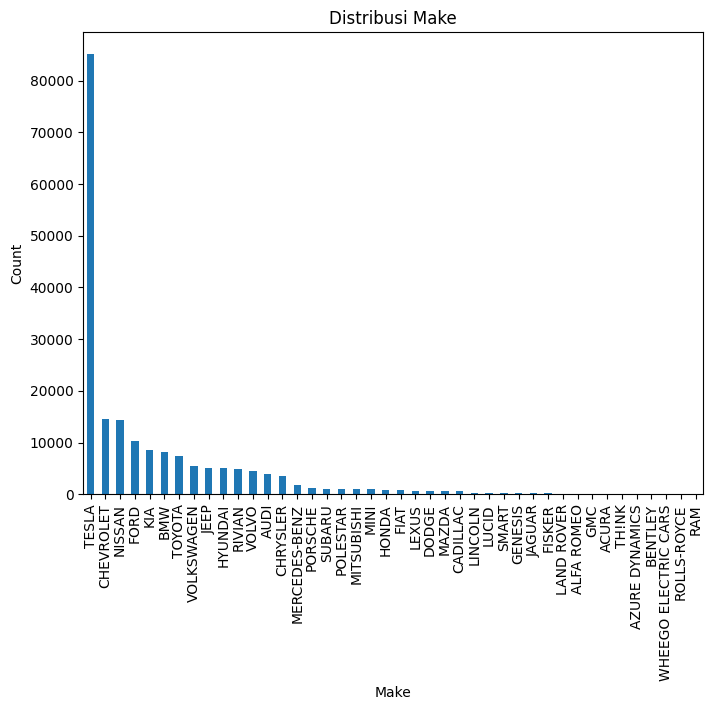

In [10]:
plt.figure(figsize=(8, 6))
df['Make'].value_counts().plot(kind='bar')
plt.title("Distribusi Make")
plt.xlabel("Make")
plt.ylabel("Count")
plt.show()



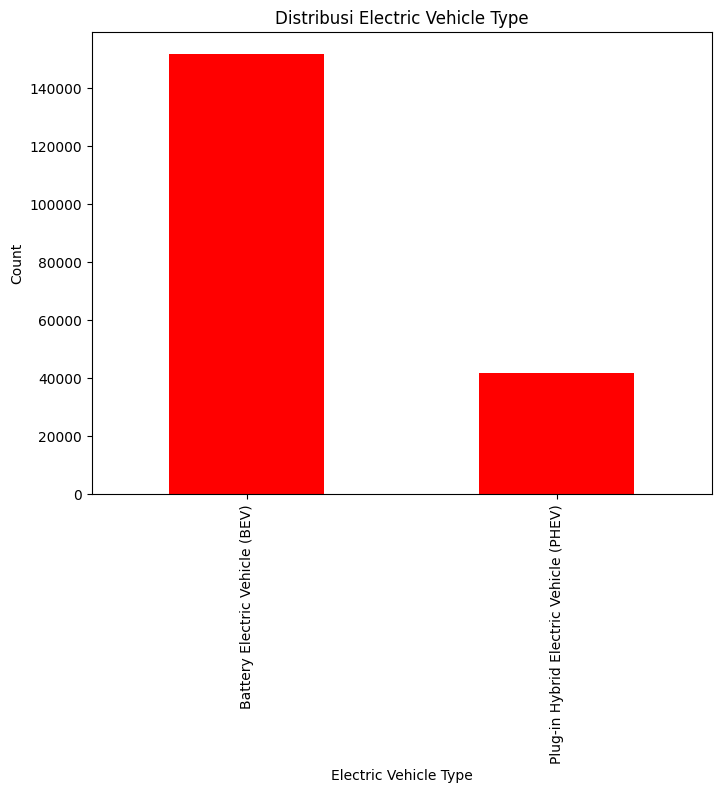

In [11]:

plt.figure(figsize=(8, 6))
df['Electric Vehicle Type'].value_counts().plot(kind='bar', color='red')
plt.title("Distribusi Electric Vehicle Type")
plt.xlabel("Electric Vehicle Type")
plt.ylabel("Count")
plt.show()



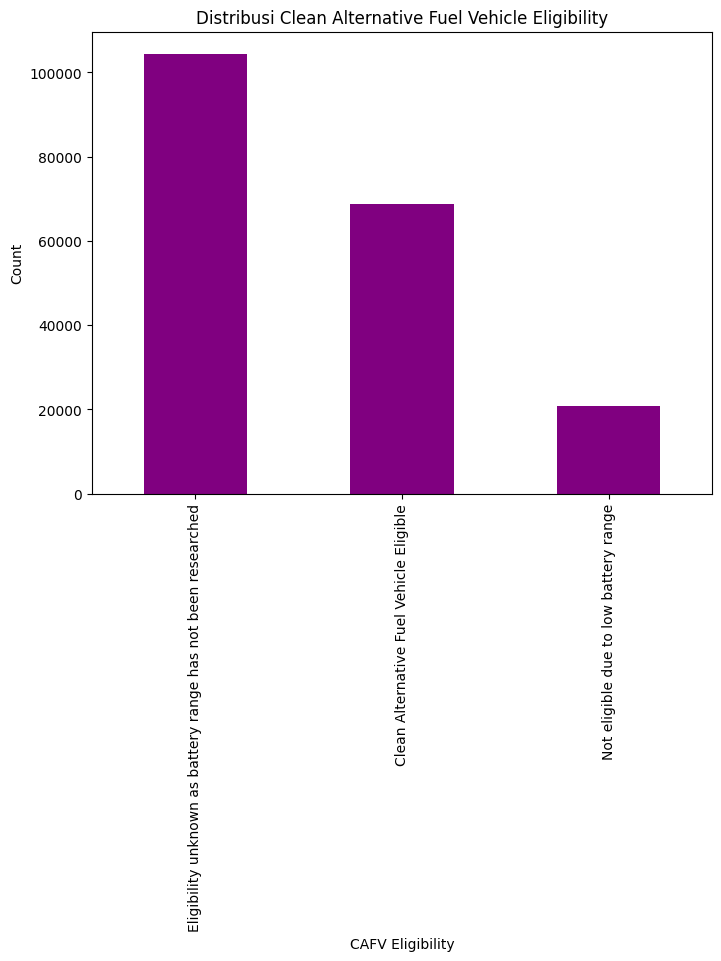

In [12]:

plt.figure(figsize=(8, 6))
df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts().plot(kind='bar', color='purple')
plt.title("Distribusi Clean Alternative Fuel Vehicle Eligibility")
plt.xlabel("CAFV Eligibility")
plt.ylabel("Count")
plt.show()

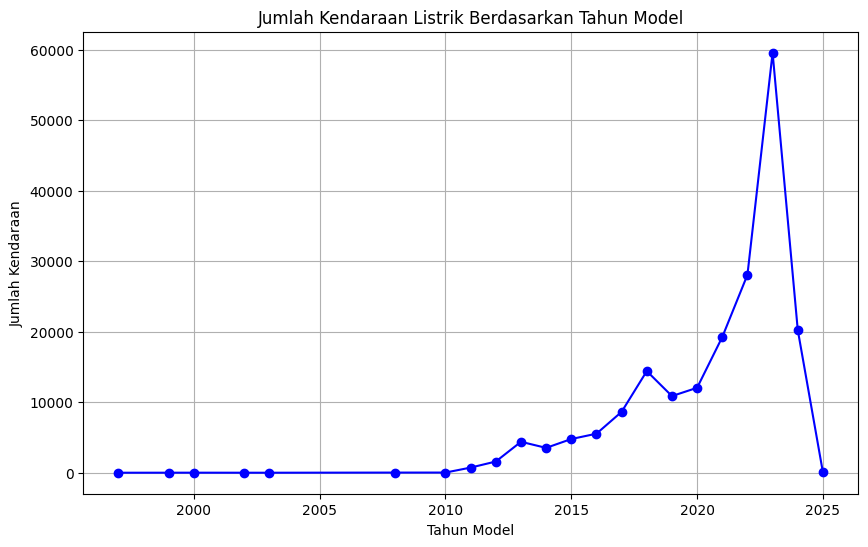

In [13]:
year_counts = df['Model Year'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.plot(year_counts.index, year_counts.values, marker='o', linestyle='-', color='b')


plt.title('Jumlah Kendaraan Listrik Berdasarkan Tahun Model')
plt.xlabel('Tahun Model')
plt.ylabel('Jumlah Kendaraan')
plt.grid(True)


plt.show()

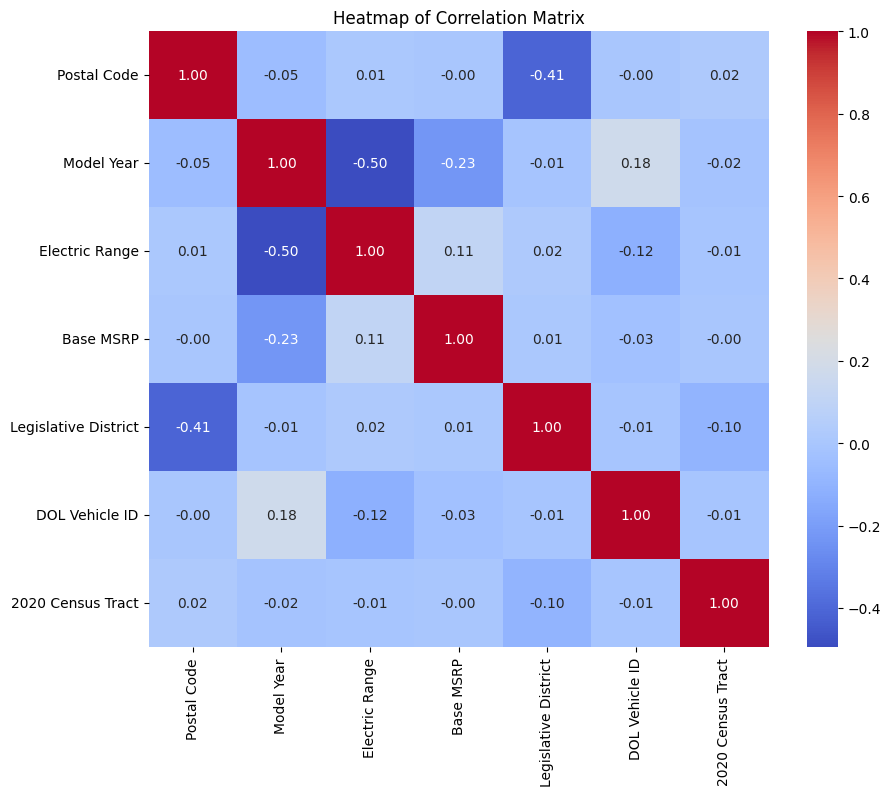

In [14]:
correlation_matrix = df.select_dtypes(include=['number']).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Correlation Matrix')
plt.show()

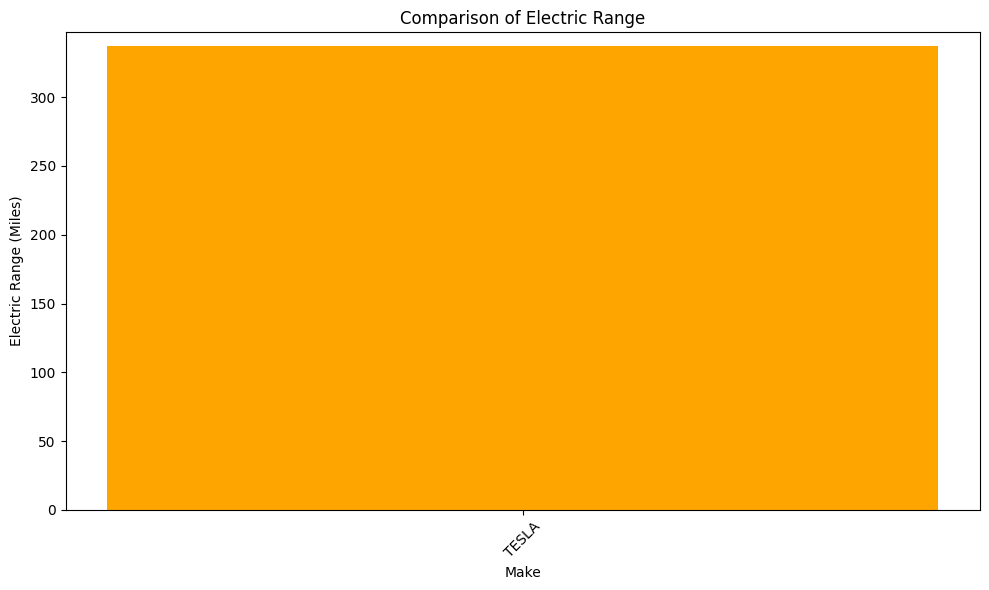

,Make,Make,Electric Range
1039,TESLA,TESLA,337.0
1374,TESLA,TESLA,337.0
4263,TESLA,TESLA,337.0
7510,TESLA,TESLA,337.0
9233,TESLA,TESLA,337.0


In [15]:

df['Electric Range'] = pd.to_numeric(df['Electric Range'], errors='coerce')


highest_range_model = df.loc[df['Electric Range'].idxmax()]

comparison_models = df.nlargest(5, 'Electric Range')

plt.figure(figsize=(10, 6))
plt.bar(comparison_models['Make'], comparison_models['Electric Range'], color='orange')
plt.title('Comparison of Electric Range')
plt.xlabel('Make')
plt.ylabel('Electric Range (Miles)')
plt.ylim(0, comparison_models['Electric Range'].max() + 10)
plt.xticks(rotation=45)
plt.tight_layout()


plt.show()


comparison_models[['Make', 'Make', 'Electric Range']]